# Chapter 10, Scientific Computing, Prof. Michael Heath

## Computer Problem 10.1 

Solve the two point BVP 

$$ u'' = 10u^3 + 3u + t^2, 0 < t < 1 $$

with boundary conditions

$$ u(0) = 0 $$ 
$$u(1) = 1$$

by each of the following methods: 
- Shooting Method 
- Finite Difference Method 

### 1. Shooting Method using the Runge-Kutta Order 4 Method (RK4)

#### 1.1. Transform the second-order ODE into a system of two first-order ODEs.

Let $y_1 = u$, $y_2 = u'$, and $y = [y_1, y_2]^T$. Then $y' = [y'_1, y'_2]^T = [y_2, 10 y_1^3 + 3y_1 + t^2]^T$.

In [1]:
import numpy as np 

def y_prime(t, y):
    y1 = y[0]
    y2 = y[1]
    
    new_y1 = y2 
    new_y2 = 10 * np.power(y1, 3) + 3 * y1 + np.power(t, 2)
    
    return np.array([new_y1, new_y2])

#### 1.2. Define the ODE solver: Runge-Kutta 4 (RK4)

In [2]:
def rk4(f, t0, y0, tn, h):
    """
    f  model
    t0 starting time
    y0 initial value
    tn time n
    h  step size
    """
    # Output variables 
    t = [t0]
    y = [y0]
    
    # current time (ti) and estimate (yi)
    ti = t0
    yi = y0
    
    while ti < tn:
        ti = ti + h
        
        # RK4 Definition
        k1 = f(ti, yi)
        k2 = f(ti+h/2, yi+h*k1/2)
        k3 = f(ti+h/2, yi+h*k2/2)
        k4 = f(ti+h, yi+h*k3)
        yi = yi + h/6*(k1+2*k2+2*k3+k4)
        
        # Appends time and estimate to result variables
        t.append(ti)
        y.append(yi)
        
    return t, y

#### 1.3. Guess the slope u' of the solution.

0.5 1.0761849308083355
0.49 1.0481810501160067
0.48 1.02079306130263
0.47 0.9939941777554209


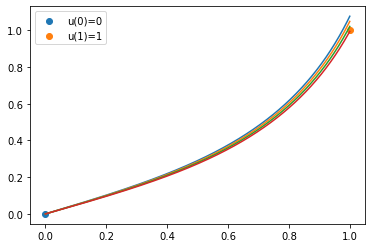

In [8]:
import matplotlib.pyplot as plt 

plt.scatter(0, 0, label="u(0)=0")
plt.scatter(1, 1, label="u(1)=1")
plt.legend()

f = y_prime              # the ODE to solve
t0 = 0                   # start point
tn = 1                   # end point
h = 0.001          # RK4 step size

u1 = 1                    # end boundary condition: u(1) = 1 
slope = 0.5               # guess for the slope
slope_step = 0.01 # 0.01   # slope step
etol = 0.01         # error tolerance
error = 1                 # error 

while error > etol:
    y0 = np.array([0, slope])               # [solution, slope]
    t, y = rk4(f, t0, y0, tn, h)            # solves the IVP using RK4
    solution = [point[0] for point in y]    # gets the solution for plotting
    u1_guess = solution[-1]                 # approximate solution for u(1)
    
    # Plotting
    plt.plot(t, solution)
    print(slope, u1_guess)
    
    # Guessing the slope
    if u1_guess > u1:
        slope = slope - slope_step
    elif u1_guess < u1: 
        slope = slope + slope_step
    
    # Error Computation
    error = np.abs(u1 - u1_guess)

### 2. Finite Difference Method 

#### 2.1. Define the Finite Difference Approximation:

$$ y''_i \approx \frac{y_{i+1} - 2y_i + y_{i-1}}{h^2} $$  
$$ 10u^3 + 3u + t^2 \approx \frac{y_{i+1} - 2y_i + y_{i-1}}{h^2} $$

Let $y_i = u$, then 
$$ 10y_i^3 + 3y_i + t^2 \approx \frac{y_{i+1} - 2y_i + y_{i-1}}{h^2} $$
$$ 10y_i^3 + \frac{3h^2 + 2}{h^2} y_i - (\frac{ y_{i+1} + y_{i-1} }{h^2} - t^2) \approx 0 $$

We have a Cubic Equation, i.e., $ax^3 + bx^2 + cx + d = 0$.
- $a = 10$
- $b = 0$
- $c = \frac{3h^2 + 2}{h^2}$
- $d = - (\frac{ y_{i+1} + y_{i-1} }{h^2} - t^2)$

#### 2.2. Define the cubic equation solver.

Code of Shril on GitHub: https://github.com/shril/CubicEquationSolver

In [4]:
import CubicEquationSolver
# CubicEquationSolver.solve(1, 0, 1, 0)

#### 2.3 Define the Finite Difference Method

In [5]:
def finite_difference_approximation(ystart, yend, h, t):
    a = 10
    b = 0
    c = (3 * h**2 + 2) / h**2
    d = - (((ystart + yend) / h**2) - t**2)
    return CubicEquationSolver.solve(a, b, c, d)

#### 2.4. Solve the BVP

/Users/jimuelcelestejr/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


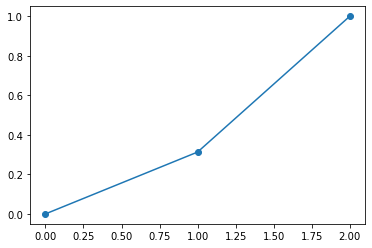

In [6]:
size = lambda n: 1 / (n + 1)
ystart = 0 
yend = 1
t = 0.5
n = 3
y = finite_difference_approximation(ystart, yend, h, t)
plt.plot([ystart, y[0], yend], "o-")